# **Sobreajuste y Regularización**

## **1. Que es el sobreajuste y subajuste en un modelo de Machine Learning?**

* **Definición de sobreajuste:** se da cuando el modelo aprende demasiado de los datos de entrenamiento, capturando ruido y patrones específicos de ese conjunto, lo que afecta su capacidad de generalización.
* **Definición de subajuste:** es cuando el modelo es demasiado simple para captar los patrones subyacentes en los datos.

## **Ejemplo de sobreajuste y subajuste**

Vamos a visualizar un conjunto de datos sinteticos distribuidos en circulos concentrico. En este caso tenemos dos clases: Clase 0 (roja) y clase 1 (azul). Vamos a intentar simular un problema de clasificacion binaria no lineal.

/tmp/ipykernel_19726/4134752249.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


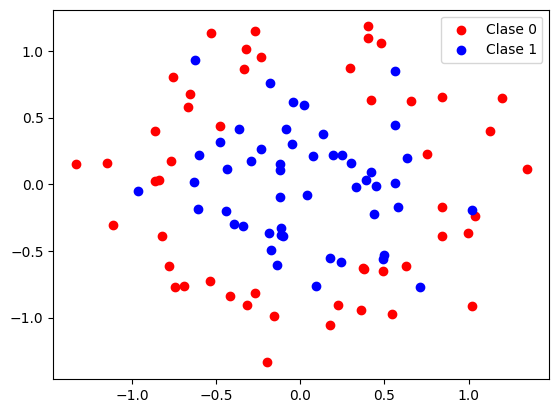

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

### *Representacion del Subjauste: Modelo de IA muy simple que no separa de la mejor manera*

Trazamos una linea recta en $y=0$ la cual representa las predicciones del modelo de IA.

/tmp/ipykernel_19726/1348604006.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


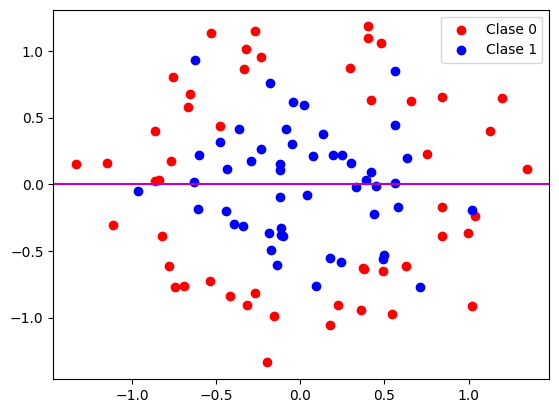

In [4]:
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

ax.axhline(y=0, xmax=0, xmin=1, color="m")

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

> Como vemos, el modelo es tan simple (una linea recta) que no logra separar las clases.

### *Representacion del Sobreajuste: Modelo de IA tan complejo que clasifica el 100% de las muestras durante la fase de entrenamiento*

> En este caso, el modelo se ajusta tan bien a los datos de entrenamiento que logra separar las dos clase en un 100%. Esto podria presentar problemas a la hora de evaluar el modelo con muestras nuevas ya que puede clasificar de manera erronea algunas clases.

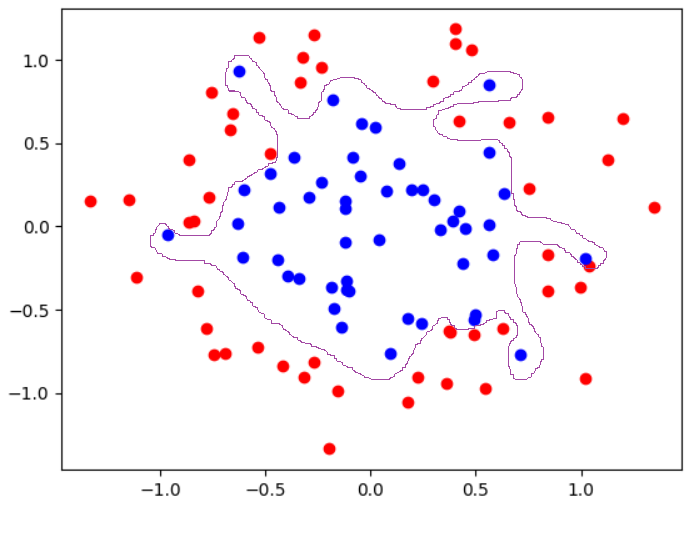

### *Representacion de un Modelo de IA ajustado*

/tmp/ipykernel_19726/3808937817.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


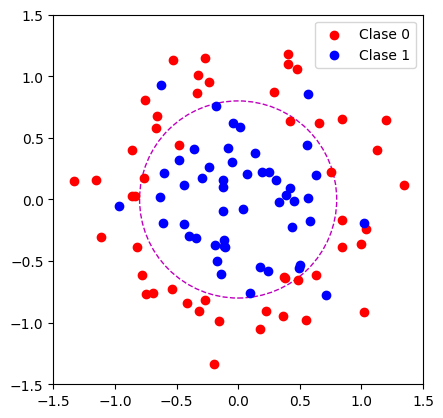

In [5]:
from sklearn.datasets import make_circles
from matplotlib.patches import Circle

# Crear la figura y los ejes
fig, ax = plt.subplots()

# Definir la circunferencia con centro en (0,0) y radio 0.5
circle = Circle((0, 0), .8, color='m', fill=False  , ls='--')
# Añadir la circunferencia a los ejes
ax.add_patch(circle)
# Ajustar los límites de los ejes para que la circunferencia esté bien centrada
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
# Configurar los ejes con la misma escala
ax.set_aspect('equal')

# Generar el dataset make_circles
X, y = make_circles(n_samples=100, noise=0.2, factor=0.5, random_state=42)

# Graficar los puntos de make_circles con colores rojo y azul para cada clase
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Clase 0')
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Clase 1')

# agregamos la leyenda
ax.legend()

fig.show()

> En este caso, el modelo logra separar gran parte de la clase 1 de la clase 0. Este seria un comportamiento esperado de un modelo de IA debido a que presenta un margen de error minimo en cuanto a algunas predicciones logrando capturar la mayor parte de la muetras de clase 1.

## **2. ¿Cómo Identificar el sobreajuste?**
* **Gráficas de error (train vs test):** Cómo comparar el error en los conjuntos de entrenamiento y prueba para detectar sobreajuste.
* **Métricas de desempeño:** Uso de métricas como la pérdida ($loss$) y la precisión ($accuracy$) en los datos de entrenamiento y validación para identificar si un modelo está sobreajustado.

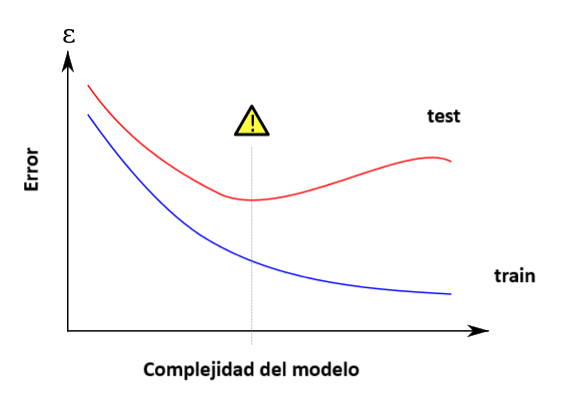

https://machinelearningparatodos.com/que-es-el-sobreajuste-u-overfitting-y-por-que-debemos-evitarlo/

Modificada

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo con Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo y almacenar el historial
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Graficar las pérdidas de entrenamiento y validación
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


2024-09-24 18:48:48.358504: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 18:48:48.742632: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 18:48:48.982408: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 18:48:49.181093: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 18:48:49.231954: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 18:48:49.647827: I tensorflow/core/platform/cpu_feature_gu

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


/home/jbernal/anaconda3/envs/redesn/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: object __array__ method not producing an array

## **3. Regularización**

* **Definición de regularización:** Concepto de agregar un término a la función de costo para penalizar modelos con parámetros muy grandes o complejos, previniendo el sobreajuste.
* **Tipos de regularización:**


* **Regularización L1 (Lasso):** Penaliza la suma de los valores absolutos de los pesos del modelo.


## $J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$

* **Regularización L2 (Ridge):** Penaliza la suma de los cuadrados de los pesos del modelo.



## $J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \displaystyle \frac{1}{2 \cdot N} \cdot \displaystyle\sum_{j=1}^{N}w_j^2$

* **Regularización $ElasticNet\ (L1\ y\ L2)$**

## $C = r \cdot Lasso + (1-r) \cdot Ridge$

## $J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + r \cdot \lambda \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j| + (1-r) \cdot \lambda \frac{1}{2N}\displaystyle\sum_{j=1}^{N}w_j^2$

### Si $r=1$, entonces

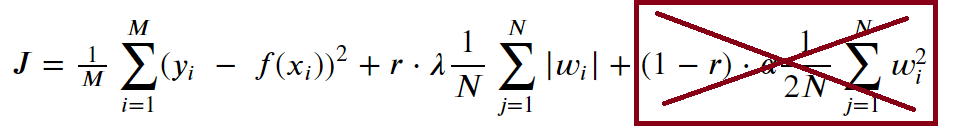

### Si $r=0$, entonces

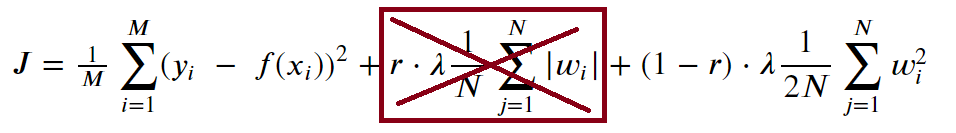

#### **Técnicas comunes de regularización en redes neuronales**
* **Dropout:**
Funciona desconectando neuronas de manera aleatoria durante el entrenamiento para evitar que el modelo dependa demasiado de neuronas específicas.


* **Early Stopping:**
Detiene el entrenamiento antes de que el modelo sobreentrene, utilizando los datos de validación.


* **Batch Normalization:**
Explicación de cómo la normalización de lotes ayuda a estabilizar el entrenamiento de redes neuronales profundas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo con Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
